In [15]:
import matplotlib.pyplot as plt
states = [x for x in range(101)]
reward = [0]*101
reward[100] = 1
p = 0.45


In [16]:
def Compute_Value_Function():
    value_func = [0]*101
    error = 1
    while error > 0:
        error = 0
        for s in states:
            value = value_func[s]
            value_func[s] = Return_Maximum_Action(s,value_func)[0]
            error = max(error, abs(value - value_func[s]))
    return value_func


def Return_Maximum_Action(s,value_func):
    actions = [i for i in range(1,min(s,100-s)+1)]
    new_value = 0
    action  = 0
    for i, a in enumerate(actions):
        expected =  p*(value_func[s+a]+reward[s+a]) + (1-p)*(value_func[s-a]+reward[s-a])
        if expected > new_value:
            new_value = expected
            action = i
    return (new_value, action)

def Compute_Policy(value_func):
    policy = []
    for s in states:
        optimal_action = Return_Maximum_Action(s,value_func)[1]
        policy.append(optimal_action)
    return policy

In [17]:
value_func = Compute_Value_Function()
policy = Compute_Policy(value_func)

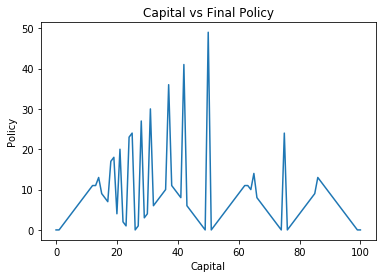

In [18]:
#Plot the Policy against the Capital
x = states
y = policy
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Policy')
plt.title('Capital vs Final Policy')
plt.show()

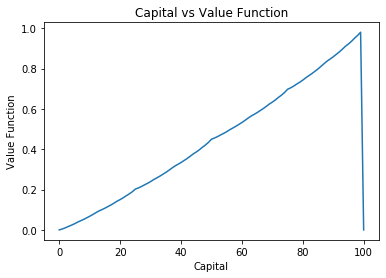

In [19]:
#Plot Value Function against Capital
y = value_func
plt.plot(x, y)
plt.xlabel('Capital')
plt.ylabel('Value Function')
plt.title('Capital vs Value Function')
plt.show()